In [1]:
from nas.nas import NAS
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

import warnings

warnings.filterwarnings("ignore")

SEED = 42

[WARNING 04-30 17:01:47] ax.service.utils.with_db_settings_base: Ax currently requires a sqlalchemy version below 2.0. This will be addressed in a future release. Disabling SQL storage in Ax for now, if you would like to use SQL storage please install Ax with mysql extras via `pip install ax-platform[mysql]`.


In [2]:
DATA_PATH = "/Users/camille.hascoet/Documents/greenai/src/hale/sandbox/data/tracks.csv"


def get_data(path: str = DATA_PATH):
    df = pd.read_csv(path)
    X = df.drop(
        ["popularity", "id", "name", "artists", "id_artists", "release_date"], axis=1
    )
    y = df["popularity"]
    X_drop = X.drop(
        ["mode", "valence", "key", "duration_ms", "speechiness", "liveness"], axis=1
    )
    X.drop = X.drop(
        [
            "loudness",
            "energy",
            "explicit",
            "acousticness",
            "instrumentalness",
            "danceability",
        ],
        axis=1,
    )

    X_scaler = StandardScaler()
    X_scaled = X_scaler.fit_transform(X_drop)
    y_scaled = y.values.reshape(-1, 1) / 100

    X_shuffled, y_shuffled = shuffle(X_scaled, y_scaled, random_state=SEED)

    X_train = X_shuffled[:25000]
    y_train = y_shuffled[:25000]

    print(y_train.mean(), y_scaled.mean())

    return X_train, y_train

In [3]:
X, y = get_data()

0.2761744 0.2757005277224752


In [5]:
test_nas = NAS(
    search_spaces_names=["small_nn", "mlp", "dt", "knn", "svr", "lr", "xgb", "rf"],
    X=X,
    y=y,
    num_trials=30,
    search_spaces_weight=[
        7 / 30,
        6 / 30,
        5 / 30,
        2 / 30,
        2 / 30,
        1 / 30,
        2 / 30,
        5 / 30,
    ],
)

No search spaces provided, using default search spaces


In [6]:
test_nas.run_nas()

[INFO 04-30 17:02:20] ax.modelbridge.dispatch_utils: Using Models.BOTORCH_MODULAR since there is at least one ordered parameter and there are no unordered categorical parameters.
[INFO 04-30 17:02:20] ax.modelbridge.dispatch_utils: Calculating the number of remaining initialization trials based on num_initialization_trials=None max_initialization_trials=None num_tunable_parameters=4 num_trials=7 use_batch_trials=False
[INFO 04-30 17:02:20] ax.modelbridge.dispatch_utils: calculated num_initialization_trials=5
[INFO 04-30 17:02:20] ax.modelbridge.dispatch_utils: num_completed_initialization_trials=0 num_remaining_initialization_trials=5
[INFO 04-30 17:02:20] ax.modelbridge.dispatch_utils: `verbose`, `disable_progbar`, and `jit_compile` are not yet supported when using `choose_generation_strategy` with ModularBoTorchModel, dropping these arguments.
[INFO 04-30 17:02:20] ax.modelbridge.dispatch_utils: Using Bayesian Optimization generation strategy: GenerationStrategy(name='Sobol+BoTorch',

Running NAS for small_nn


[INFO 04-30 17:02:20] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:02:20] Scheduler: Waiting for completed trials (for 1 sec, currently running trials: 1).
[INFO 04-30 17:02:21] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:02:21] Scheduler: Waiting for completed trials (for 1.5 sec, currently running trials: 1).
[INFO 04-30 17:02:22] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:02:22] Scheduler: Waiting for completed trials (for 2 sec, currently running trials: 1).
[INFO 04-30 17:02:25] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:02:25] Scheduler: Waiting for completed trials (for 3 sec, currently running trials: 1).
[INFO 04-30 17:02:28] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:02:28] Scheduler: Waiting for completed trials (for 5 sec, currently running trials: 1).
[INFO 04-30 17:02:33] Scheduler: Fetching data for newly completed trials: [].
[INF

Running NAS for mlp


[INFO 04-30 17:10:05] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:10:05] Scheduler: Waiting for completed trials (for 1.5 sec, currently running trials: 1).
[INFO 04-30 17:10:07] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:10:07] Scheduler: Waiting for completed trials (for 2 sec, currently running trials: 1).
[INFO 04-30 17:10:09] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:10:09] Scheduler: Waiting for completed trials (for 3 sec, currently running trials: 1).
[INFO 04-30 17:10:13] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:10:13] Scheduler: Waiting for completed trials (for 5 sec, currently running trials: 1).
[INFO 04-30 17:10:18] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:10:18] Scheduler: Waiting for completed trials (for 7 sec, currently running trials: 1).
[INFO 04-30 17:10:25] Scheduler: Fetching data for newly completed trials: [].
[INF

Running NAS for dt


[INFO 04-30 17:14:04] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:14:04] Scheduler: Waiting for completed trials (for 1 sec, currently running trials: 1).
[INFO 04-30 17:14:05] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:14:05] Scheduler: Waiting for completed trials (for 1.5 sec, currently running trials: 1).
[INFO 04-30 17:14:06] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:14:06] Scheduler: Waiting for completed trials (for 2 sec, currently running trials: 1).
[INFO 04-30 17:14:08] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:14:08] Scheduler: Waiting for completed trials (for 3 sec, currently running trials: 1).
[INFO 04-30 17:14:12] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:14:12] Scheduler: Waiting for completed trials (for 5 sec, currently running trials: 1).
[INFO 04-30 17:14:17] Scheduler: Fetching data for newly completed trials: [].
[INF

Running NAS for knn


[INFO 04-30 17:16:49] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:16:49] Scheduler: Waiting for completed trials (for 1 sec, currently running trials: 1).
[INFO 04-30 17:16:50] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:16:50] Scheduler: Waiting for completed trials (for 1.5 sec, currently running trials: 1).
[INFO 04-30 17:16:52] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:16:52] Scheduler: Waiting for completed trials (for 2 sec, currently running trials: 1).
[INFO 04-30 17:16:54] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:16:54] Scheduler: Waiting for completed trials (for 3 sec, currently running trials: 1).
[INFO 04-30 17:16:58] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:16:58] Scheduler: Waiting for completed trials (for 5 sec, currently running trials: 1).
[INFO 04-30 17:17:03] Scheduler: Fetching data for newly completed trials: [].
[INF

Running NAS for svr


[INFO 04-30 17:17:56] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:17:56] Scheduler: Waiting for completed trials (for 1.5 sec, currently running trials: 1).
[INFO 04-30 17:17:58] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:17:58] Scheduler: Waiting for completed trials (for 2 sec, currently running trials: 1).
[INFO 04-30 17:18:00] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:18:00] Scheduler: Waiting for completed trials (for 3 sec, currently running trials: 1).
[INFO 04-30 17:18:03] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:18:03] Scheduler: Waiting for completed trials (for 5 sec, currently running trials: 1).
[INFO 04-30 17:18:08] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:18:08] Scheduler: Waiting for completed trials (for 7 sec, currently running trials: 1).
[INFO 04-30 17:18:16] Scheduler: Fetching data for newly completed trials: [].
[INF

Running NAS for lr


[INFO 04-30 17:20:23] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:20:23] Scheduler: Waiting for completed trials (for 1.5 sec, currently running trials: 1).
[INFO 04-30 17:20:25] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:20:25] Scheduler: Waiting for completed trials (for 2 sec, currently running trials: 1).
[INFO 04-30 17:20:27] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:20:27] Scheduler: Waiting for completed trials (for 3 sec, currently running trials: 1).
[INFO 04-30 17:20:30] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:20:30] Scheduler: Waiting for completed trials (for 5 sec, currently running trials: 1).
[INFO 04-30 17:20:35] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:20:35] Scheduler: Waiting for completed trials (for 7 sec, currently running trials: 1).
[INFO 04-30 17:20:43] Scheduler: Fetching data for newly completed trials: [].
[INF

Running NAS for xgb


[INFO 04-30 17:20:56] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:20:56] Scheduler: Waiting for completed trials (for 1.5 sec, currently running trials: 1).
[INFO 04-30 17:20:57] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:20:57] Scheduler: Waiting for completed trials (for 2 sec, currently running trials: 1).
[INFO 04-30 17:21:00] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:21:00] Scheduler: Waiting for completed trials (for 3 sec, currently running trials: 1).
[INFO 04-30 17:21:03] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:21:03] Scheduler: Waiting for completed trials (for 5 sec, currently running trials: 1).
[INFO 04-30 17:21:08] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:21:08] Scheduler: Waiting for completed trials (for 7 sec, currently running trials: 1).
[INFO 04-30 17:21:16] Scheduler: Fetching data for newly completed trials: [].
[INF

Running NAS for rf


[INFO 04-30 17:22:01] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:22:01] Scheduler: Waiting for completed trials (for 1.5 sec, currently running trials: 1).
[INFO 04-30 17:22:02] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:22:02] Scheduler: Waiting for completed trials (for 2 sec, currently running trials: 1).
[INFO 04-30 17:22:04] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:22:04] Scheduler: Waiting for completed trials (for 3 sec, currently running trials: 1).
[INFO 04-30 17:22:08] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:22:08] Scheduler: Waiting for completed trials (for 5 sec, currently running trials: 1).
[INFO 04-30 17:22:13] Scheduler: Fetching data for newly completed trials: [].
[INFO 04-30 17:22:13] Scheduler: Waiting for completed trials (for 7 sec, currently running trials: 1).
[INFO 04-30 17:22:20] Scheduler: Fetching data for newly completed trials: [].
[INF

In [7]:
test_nas.exp_to_df(name="small_nn")

[WARNING 04-30 17:29:05] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.


trial_index arm_name trial_status generation_method  inference_emissions  \
0            0      0_0    COMPLETED             Sobol         4.888093e-09   
1            1      1_0    COMPLETED             Sobol         7.566308e-09   
2            2      2_0    COMPLETED             Sobol         2.685389e-09   
3            3      3_0    COMPLETED             Sobol         3.013956e-09   
4            4      4_0    COMPLETED             Sobol         4.390525e-09   
5            5      5_0    COMPLETED           BoTorch         3.661537e-09   
6            6      6_0    COMPLETED           BoTorch         2.950257e-09   

        mae  hidden_size_1  hidden_size_2  learning_rate   dropout  
0  0.134868             87             60       0.037533  0.253675  
1  0.151072             72             23       0.055137  0.024829  
2  0.152879             92             29       0.079770  0.149092  
3  0.131671             90             87       0.027884  0.093178  
4  0.132983             63             41       0.022083  0.269789  
5  0.131392             94             94       0.010000  0.218877  
6  0.129541             62             62       0.010000  0.161703

[WARNING 04-30 17:29:11] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.


[WARNING 04-30 17:29:11] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:11] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:11] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:11] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:11] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:11] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:11] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.


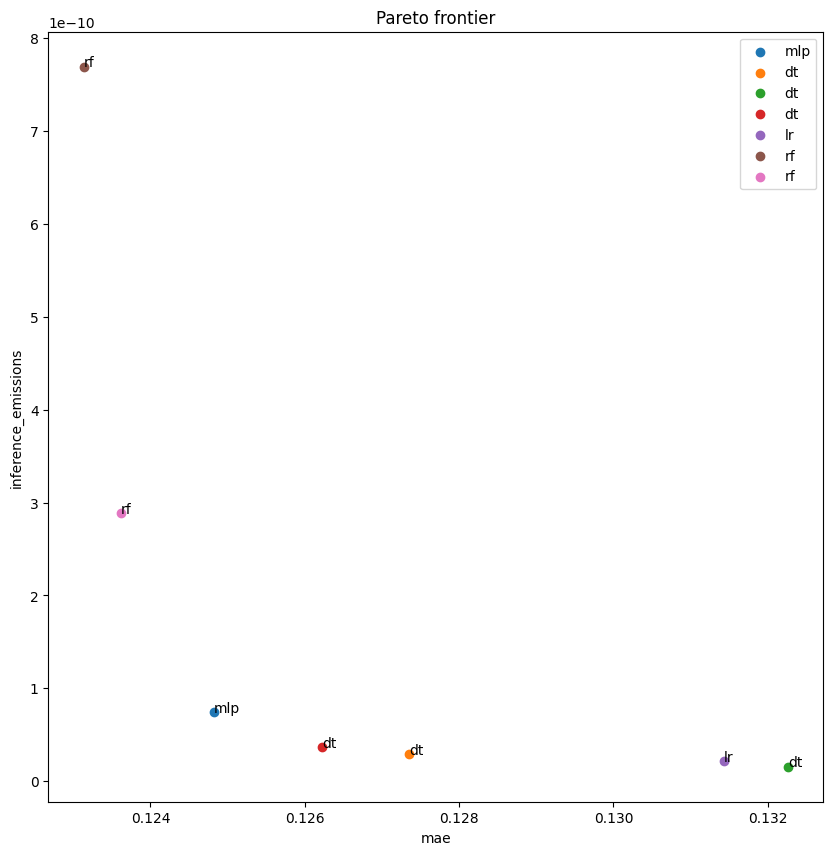

[WARNING 04-30 17:29:12] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:12] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:12] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:12] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:12] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:12] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:12] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:12] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.


{'small_nn': [{'x': 0.13486826419830322, 'y': 4.888093041444108e-09, 'pareto': False}, {'x': 0.15107181668281555, 'y': 7.566308468653915e-09, 'pareto': False}, {'x': 0.15287886559963226, 'y': 2.6853892443057248e-09, 'pareto': False}, {'x': 0.13167090713977814, 'y': 3.013956417774466e-09, 'pareto': False}, {'x': 0.13298287987709045, 'y': 4.3905252766762715e-09, 'pareto': False}, {'x': 0.1313915252685547, 'y': 3.661536851495839e-09, 'pareto': False}, {'x': 0.1295413076877594, 'y': 2.9502573717365976e-09, 'pareto': False}], 'mlp': [{'x': 0.12483073025941849, 'y': 2.8382951544614343e-09, 'pareto': False}, {'x': 0.12713971734046936, 'y': 4.1151103358227914e-11, 'pareto': False}, {'x': 0.12482510507106781, 'y': 7.446587790838066e-11, 'pareto': True}, {'x': 0.125285804271698, 'y': 7.195866680298479e-10, 'pareto': False}, {'x': 0.132798969745636, 'y': 8.9616136733639e-10, 'pareto': False}, {'x': 0.13214223086833954, 'y': 5.64850111128834e-11, 'pareto': False}], 'dt': [{'x': 0.12734927237033844

In [8]:
test_nas.plot_pareto()

print(test_nas.get_pareto_dict())

[WARNING 04-30 17:29:12] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:12] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:12] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:12] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:12] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:12] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:12] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:12] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.


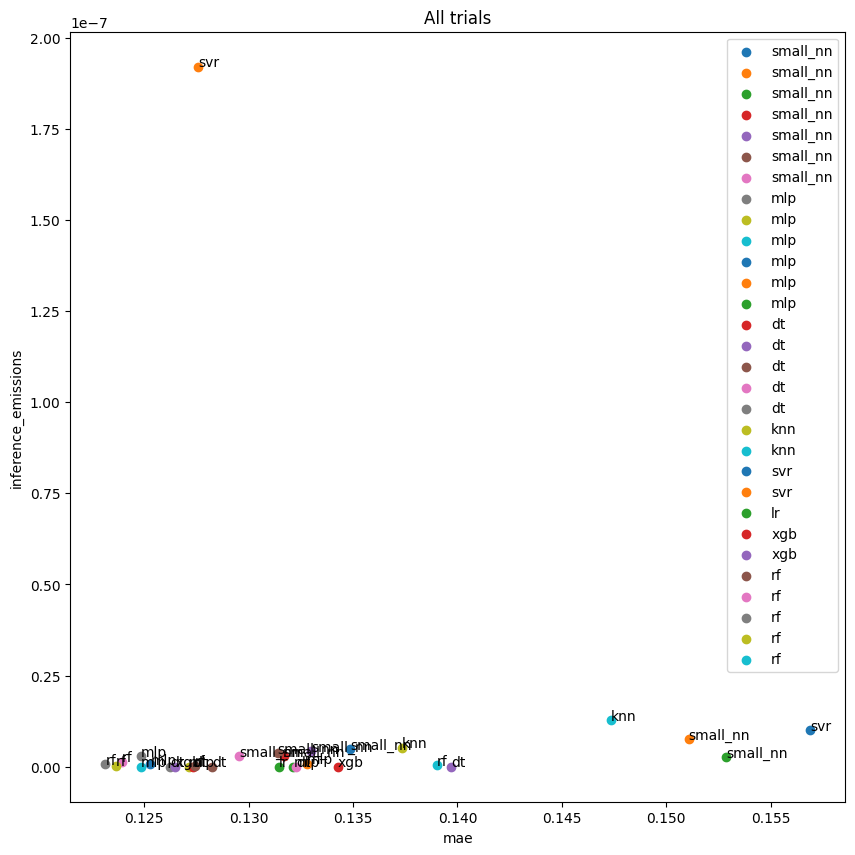

In [9]:
test_nas.plot_all_trials()

In [10]:
test_nas.remove_tmp_files()

In [11]:
param_dict = test_nas.get_pareto_points_params()
# print keys
print(param_dict)

[WARNING 04-30 17:29:14] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:14] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:14] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:14] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:14] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:14] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:14] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 04-30 17:29:14] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.


{'mlp_2': trial_index                    2
arm_name                     2_0
trial_status           COMPLETED
generation_method          Sobol
inference_emissions          0.0
mae                     0.124825
hidden_layer_sizes            20
hidden_layer_number            4
activation                  relu
Name: 2, dtype: object, 'dt_0': trial_index                       0
arm_name                        0_0
trial_status              COMPLETED
generation_method             Sobol
inference_emissions             0.0
mae                        0.127349
max_depth                         5
min_samples_split                 7
criterion              friedman_mse
Name: 0, dtype: object, 'dt_3': trial_index                       3
arm_name                        3_0
trial_status              COMPLETED
generation_method             Sobol
inference_emissions             0.0
mae                        0.132262
max_depth                         2
min_samples_split                 4
criterion        